## AND gate : 
two-layer neural network

In [409]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [410]:
#Units or neurons in Inputlayers ,hiddenlayers and output layer
num_in = 10
num_hidd = 10
num_out = 10
n_sample = 300

In [411]:
#Hyperparameters
learning_rate = 0.01
momentum = 0.9

In [412]:
#random seed
np.random.seed(1)

In [413]:
#sigmoid activation function (changing numbers to probability values (btw 0 and 1))   - for layer 1
def sigmoid(X):
    return 1/(1 + np.exp(-X))

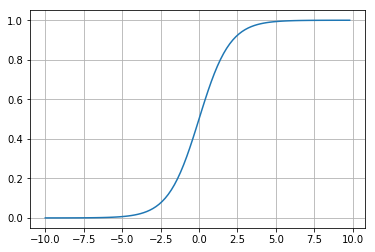

In [414]:
X = np.arange(-10,10,0.2)
sig = sigmoid(X)
plt.plot(X,sig)
plt.grid(True)
plt.show()


In [415]:
#tangent prime activation function (derivative of sigmoid function)  -for layer 2 
def tanh_prime(X):
    return 1-np.tanh(X) ** 2

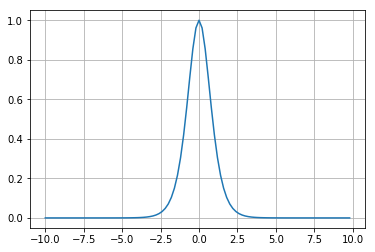

In [416]:
tan = tanh_prime(X)
plt.plot(X,tan)
plt.grid(True)
plt.show()

In [417]:
#Training function
def train(X,exp_output,V,W,bV,bW):   #input,transspose,layer1,layer2,Biases
    #(first layer contains input values (features)
    
    #forward propogation (compute activation values of the output)
    Theta1 = np.dot(X,V) + bV
    Z = np.tanh(Theta1) #did second layer(tangent prime) 
    Theta2 = np.dot(Z,W) + bW
    pred_output = sigmoid(Theta2) #did output layer(Sigmoid function)
    
    #Backward Propogation
    EW = pred_output - exp_output           #Error in the last layer (output) 
    EV = tanh_prime(Theta1) * np.dot(W,EW)    #Error in the second layer (Hidden)
    
    dW = np.outer(Z,EW)   #predicting loss
    dV = np.outer(X,EV)
    
    #loss (cross entropy) - classification
    loss = -np.mean(exp_output * np.log(pred_output) + (1 - exp_output) * np.log(1-pred_output))
    
    return loss, (dV,dW,EV,EW)
    

In [418]:
def predict(X,V,W,bV,bW) : #input , layer1 , layer2 , biases
    Theta1 = np.dot(X,V) + bV  #parameters for layer1 - second
    Theta2 = np.dot(np.tanh(Theta1),W) + bW #parameters for layer2 - Last layer
    
    return (sigmoid(Theta2) > 0.5).astype(int)     #returns if value is greater than 0.5 its 1 else its 0 ... (Threshold = 0.5)

In [419]:
#creating the layers (V,W)...
V = np.random.normal(scale=0.1 , size = (num_in,num_hidd))
W = np.random.normal(scale=0.1 , size = (num_hidd,num_out))

In [420]:
#biasesc initaialization
bV = np.zeros(num_hidd)
bW = np.zeros(num_out)

In [421]:
#putt9ng all together
params = [V,W,bV,bW]

In [422]:
#params

In [432]:
#generating input data
X = np.random.binomial(1,0.5,(n_sample,num_in))
y = X & 1


In [433]:
#training time
for epoch in range(100):
    err = []
    upd = [0] * len(params)
    t0 = time.clock()
    for i in range(X.shape[1]):
        loss , grad = train(X[i],y[i],*params)
        
        for j in range(len(params)):
            params[j] -= upd[j]
        
        for j in range(len(params)):
            upd[j] = learning_rate * grad[j] + momentum * upd[j]
        err.append(loss)
    print('Epoch : %d , loss : %.8f , time : %fs'%(epoch , np.mean(err) , time.clock() - t0))

Epoch : 0 , loss : 0.60987819 , time : 0.002005s
Epoch : 1 , loss : 0.56672755 , time : 0.001496s
Epoch : 2 , loss : 0.54430466 , time : 0.002144s
Epoch : 3 , loss : 0.53471479 , time : 0.001094s
Epoch : 4 , loss : 0.49011517 , time : 0.001180s
Epoch : 5 , loss : 0.46304268 , time : 0.001026s
Epoch : 6 , loss : 0.42141049 , time : 0.000958s
Epoch : 7 , loss : 0.40073810 , time : 0.001179s
Epoch : 8 , loss : 0.37833761 , time : 0.001191s
Epoch : 9 , loss : 0.36408756 , time : 0.000927s
Epoch : 10 , loss : 0.34694487 , time : 0.000997s
Epoch : 11 , loss : 0.33425552 , time : 0.000915s
Epoch : 12 , loss : 0.31955464 , time : 0.001143s
Epoch : 13 , loss : 0.30741148 , time : 0.000807s
Epoch : 14 , loss : 0.29448657 , time : 0.001069s
Epoch : 15 , loss : 0.28280156 , time : 0.001392s
Epoch : 16 , loss : 0.27140694 , time : 0.000853s
Epoch : 17 , loss : 0.26052424 , time : 0.002660s
Epoch : 18 , loss : 0.25046601 , time : 0.000984s
Epoch : 19 , loss : 0.24070229 , time : 0.001204s
Epoch : 20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


In [435]:
x = np.random.binomial(1,0.5,num_in)
print('AND prediction')
print(x)
print()
print(predict(x,*params))

AND prediction
[0 1 0 0 1 0 1 0 1 0]

[0 1 0 1 1 1 1 0 1 1]
